In [36]:
!pip install seaborn

In [37]:

import pandas as pd
import numpy as np
import decimal
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
Dinero = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv",index_col=["comuna"])
Dinero.head()
Dinero_HDI = Dinero[["HDI"]]
Dinero_HDI.index.rename("COMUNA",inplace= True)
Dinero_HDI.head()

,HDI
COMUNA,
13101,0.861222
13102,0.764616
13103,0.718874
13104,0.749584
13105,0.742015


In [3]:
Edad = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv")
Edad

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7
...,...,...,...,...,...
180494,15202,*,*,6,4
180495,15202,0,0,0,0
180496,15202,0,0,0,0
180497,15202,*,0,9,*


In [4]:
Edad = Edad.replace('*', np.NaN)
Edad = Edad.astype(float)
Edad.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101.0,0.0,0.0,15.0,0.0
1,1101.0,NaN,NaN,54.0,10.0
2,1101.0,NaN,0.0,28.0,NaN
3,1101.0,NaN,7.0,49.0,NaN
4,1101.0,NaN,NaN,26.0,7.0


Edad = Edad.replace('*', np.NaN)
Edad['EDAD_0A5'] = pd.to_numeric(Edad['EDAD_0A5'])
Edad['EDAD_6A14'] = pd.to_numeric(Edad['EDAD_6A14'])
Edad['EDAD_15A64'] = pd.to_numeric(Edad['EDAD_15A64'])
Edad['EDAD_65YMAS'] = pd.to_numeric(Edad['EDAD_65YMAS'])
print (Edad.dtypes)
##### Otro metodo para convertir tipos de datos, en este caso de object a float

In [5]:
Edad = Edad.groupby(by=['COMUNA']).sum() 
Edad

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
COMUNA,,,,
1101.0,15490.0,22691.0,132629.0,16895.0
1107.0,10105.0,17365.0,72866.0,3908.0
1401.0,899.0,1786.0,9446.0,864.0
1402.0,73.0,134.0,772.0,136.0
1403.0,75.0,111.0,1246.0,148.0
...,...,...,...,...
14204.0,1433.0,2829.0,19778.0,3939.0
15101.0,16125.0,26165.0,148234.0,22224.0
15102.0,36.0,74.0,728.0,154.0


In [6]:
Edad_M = Edad.loc[13101:13132]
Edad_M["Proporcion 65YMAS"] = Edad_M["EDAD_65YMAS"]/Edad_M.sum(axis = 1)
Edad_M["Proporcion 15A64"] = Edad_M["EDAD_15A64"]/Edad_M.sum(axis = 1)
Edad_M["Proporcion 6A14"] = Edad_M["EDAD_6A14"]/Edad_M.sum(axis = 1)
Edad_M["Proporcion 0A5"] = Edad_M["EDAD_0A5"]/Edad_M.sum(axis = 1)
Edad_M["HDI"] = Dinero[["HDI"]]
Edad_M.head()

<ipython-input-6-0ec6ccc018ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Edad_M["Proporcion 65YMAS"] = Edad_M["EDAD_65YMAS"]/Edad_M.sum(axis = 1)
<ipython-input-6-0ec6ccc018ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Edad_M["Proporcion 15A64"] = Edad_M["EDAD_15A64"]/Edad_M.sum(axis = 1)
<ipython-input-6-0ec6ccc018ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,Proporcion 65YMAS,Proporcion 15A64,Proporcion 6A14,Proporcion 0A5,HDI
COMUNA,,,,,,,,,
13101.0,22618.0,23769.0,323893.0,28936.0,0.072482,0.811323,0.059539,0.056656,0.861222
13102.0,5907.0,8703.0,53650.0,9273.0,0.119601,0.691962,0.112248,0.076186,0.764616
13103.0,9719.0,14745.0,89915.0,16011.0,0.122793,0.689584,0.113083,0.074537,0.718874
13104.0,8730.0,12629.0,85791.0,16819.0,0.135671,0.692035,0.101872,0.070420,0.749584
13105.0,12071.0,18633.0,109501.0,19321.0,0.121115,0.686414,0.116802,0.075667,0.742015


## Dado que el hecho de tener una dosis de la vacuna implica directamente el hecho de asegurar recibir la segunda, estudiaremos directamente los casos de gente de rango de edad 60+ con la primera dosis

Vacunacion = pd.read_csv("vacunacion_edad.csv")
Vacunacion.head()  
#Los datos usados fueron obtenidos de https://github.com/MinCiencia/Datos-COVID19#
#en particular el dataset de vacunacion_edad.csv#

Vacunacion1 = Vacunacion.drop([1,11,13,15,17,19,21,2,3,4,5,6,7,8,9,23,25,27,29,31,33,35,37,39,41,43,45], axis = 0)
Vacunacion1

Vacunacion2 = Vacunacion1[["Age","Dose","2021-02-15","2021-02-16"]]
Vacunacion2["Total"] = Vacunacion1[["2021-02-15","2021-02-16"]].sum (axis=1)
Vacunacion2.head()

Vacunacion2 = Vacunacion1[["Age","Dose","2021-02-15","2021-02-16"]]
Total = Vacunacion1["2021-02-15"] + Vacunacion1["2021-02-16"]
Vacunacion2["Total"] = Total
Vacunacion2.head()

In [7]:
Vacunacion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv",index_col=["Codigo comuna"])
Vacunacion = Vacunacion.sort_values(by = ["Codigo comuna"],axis=0,ascending=True)
Vacunacion.head()

,Region,Codigo region,Comuna,Poblacion,15,16,17,18,19,20,...,71,72,73,74,75,76,77,78,79,80
Codigo comuna,,,,,,,,,,,,,,,,,,,,,
1101.0,Tarapaca,1,Iquique,223463.0,0.0,0.0,0.0,1033.0,1188.0,1291.0,...,1129.0,1020.0,1001.0,906.0,737.0,726.0,710.0,616.0,527.0,3975.0
1107.0,Tarapaca,1,Alto Hospicio,129999.0,0.0,0.0,0.0,479.0,634.0,592.0,...,293.0,280.0,237.0,226.0,217.0,184.0,152.0,134.0,112.0,655.0
1401.0,Tarapaca,1,Pozo Almonte,17395.0,0.0,0.0,0.0,117.0,148.0,138.0,...,55.0,71.0,56.0,52.0,67.0,51.0,46.0,37.0,46.0,197.0
1402.0,Tarapaca,1,Camina,1375.0,0.0,0.0,0.0,7.0,8.0,3.0,...,6.0,10.0,8.0,10.0,8.0,6.0,11.0,7.0,3.0,54.0
1403.0,Tarapaca,1,Colchane,1583.0,0.0,0.0,0.0,1.0,5.0,1.0,...,10.0,9.0,11.0,7.0,2.0,6.0,3.0,5.0,8.0,33.0


In [8]:
Vacunacion_M = Vacunacion.loc[13101:13132]
Vacunacion_M

,Region,Codigo region,Comuna,Poblacion,15,16,17,18,19,20,...,71,72,73,74,75,76,77,78,79,80
Codigo comuna,,,,,,,,,,,,,,,,,,,,,
13101.0,Metropolitana,13,Santiago,503147.0,0.0,0.0,0.0,444.0,602.0,872.0,...,1674.0,1608.0,1471.0,1348.0,1308.0,1276.0,1173.0,1069.0,1027.0,7386.0
13102.0,Metropolitana,13,Cerrillos,88956.0,0.0,0.0,0.0,161.0,139.0,233.0,...,455.0,474.0,497.0,509.0,379.0,428.0,386.0,376.0,392.0,2374.0
13103.0,Metropolitana,13,Cerro Navia,142465.0,0.0,0.0,0.0,261.0,345.0,404.0,...,817.0,782.0,739.0,682.0,721.0,634.0,590.0,558.0,496.0,3084.0
13104.0,Metropolitana,13,Conchali,139195.0,0.0,0.0,0.0,321.0,401.0,422.0,...,777.0,871.0,865.0,791.0,754.0,694.0,638.0,688.0,591.0,4668.0
13105.0,Metropolitana,13,El Bosque,172000.0,0.0,0.0,0.0,293.0,454.0,468.0,...,1053.0,993.0,946.0,880.0,869.0,831.0,739.0,704.0,614.0,4317.0
13106.0,Metropolitana,13,Estacion Central,206792.0,0.0,0.0,0.0,271.0,326.0,429.0,...,750.0,794.0,753.0,742.0,663.0,652.0,617.0,623.0,525.0,3999.0
13107.0,Metropolitana,13,Huechuraba,112528.0,0.0,0.0,0.0,383.0,395.0,454.0,...,569.0,559.0,570.0,586.0,511.0,475.0,428.0,381.0,372.0,2086.0
13108.0,Metropolitana,13,Independencia,142065.0,0.0,0.0,0.0,138.0,159.0,208.0,...,581.0,573.0,501.0,520.0,488.0,481.0,424.0,400.0,385.0,2748.0
13109.0,Metropolitana,13,La Cisterna,100434.0,0.0,0.0,0.0,162.0,164.0,238.0,...,687.0,606.0,621.0,589.0,542.0,533.0,505.0,447.0,446.0,3666.0


In [9]:
Vacunacion_M2 = Vacunacion_M.drop(["Region","Codigo region","Comuna","Poblacion"], axis = 1)
Vacunacion_M2["Total"] = Vacunacion_M2.sum(axis = 1)
Vacunacion_M2["Proporcion vacunados"] = Vacunacion_M2["Total"]/Vacunacion_M["Poblacion"]
Vacunacion_M2

,15,16,17,18,19,20,21,22,23,24,...,73,74,75,76,77,78,79,80,Total,Proporcion vacunados
Codigo comuna,,,,,,,,,,,,,,,,,,,,,
13101.0,0.0,0.0,0.0,444.0,602.0,872.0,1040.0,2164.0,3505.0,4379.0,...,1471.0,1348.0,1308.0,1276.0,1173.0,1069.0,1027.0,7386.0,260935.0,0.518606
13102.0,0.0,0.0,0.0,161.0,139.0,233.0,274.0,521.0,687.0,717.0,...,497.0,509.0,379.0,428.0,386.0,376.0,392.0,2374.0,47892.0,0.538379
13103.0,0.0,0.0,0.0,261.0,345.0,404.0,466.0,706.0,995.0,1145.0,...,739.0,682.0,721.0,634.0,590.0,558.0,496.0,3084.0,68397.0,0.480097
13104.0,0.0,0.0,0.0,321.0,401.0,422.0,486.0,893.0,1313.0,1334.0,...,865.0,791.0,754.0,694.0,638.0,688.0,591.0,4668.0,87113.0,0.625834
13105.0,0.0,0.0,0.0,293.0,454.0,468.0,559.0,1036.0,851.0,1439.0,...,946.0,880.0,869.0,831.0,739.0,704.0,614.0,4317.0,89761.0,0.521866
13106.0,0.0,0.0,0.0,271.0,326.0,429.0,484.0,978.0,1445.0,1650.0,...,753.0,742.0,663.0,652.0,617.0,623.0,525.0,3999.0,94092.0,0.455008
13107.0,0.0,0.0,0.0,383.0,395.0,454.0,507.0,716.0,1241.0,1333.0,...,570.0,586.0,511.0,475.0,428.0,381.0,372.0,2086.0,80495.0,0.715333
13108.0,0.0,0.0,0.0,138.0,159.0,208.0,256.0,557.0,966.0,1152.0,...,501.0,520.0,488.0,481.0,424.0,400.0,385.0,2748.0,67789.0,0.477169
13109.0,0.0,0.0,0.0,162.0,164.0,238.0,300.0,626.0,796.0,857.0,...,621.0,589.0,542.0,533.0,505.0,447.0,446.0,3666.0,60941.0,0.606777


## -------------------------------------------------------------------------------------------


In [10]:
Vacu = Vacunacion_M[["Comuna"]]
Vacu["HDI"] = Dinero[["HDI"]]
Vacu["Total Vacunados"] = Vacunacion_M2["Total"]
Vacu["Proporcion vacunados"] = Vacunacion_M2["Proporcion vacunados"]
Vacu["Proporcion 65YMAS"] = Edad_M["Proporcion 65YMAS"]
Vacu["Proporcion 15A64"] = Edad_M["Proporcion 15A64"] 
Vacu["Proporcion 6A14"] = Edad_M["Proporcion 6A14"] 
Vacu["Proporcion 0A5"] = Edad_M["Proporcion 0A5"] 
Vacu

<ipython-input-10-66a923c9549d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vacu["HDI"] = Dinero[["HDI"]]
<ipython-input-10-66a923c9549d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vacu["Total Vacunados"] = Vacunacion_M2["Total"]
<ipython-input-10-66a923c9549d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Comuna,HDI,Total Vacunados,Proporcion vacunados,Proporcion 65YMAS,Proporcion 15A64,Proporcion 6A14,Proporcion 0A5
Codigo comuna,,,,,,,,
13101.0,Santiago,0.861222,260935.0,0.518606,0.072482,0.811323,0.059539,0.056656
13102.0,Cerrillos,0.764616,47892.0,0.538379,0.119601,0.691962,0.112248,0.076186
13103.0,Cerro Navia,0.718874,68397.0,0.480097,0.122793,0.689584,0.113083,0.074537
13104.0,Conchali,0.749584,87113.0,0.625834,0.135671,0.692035,0.101872,0.070420
13105.0,El Bosque,0.742015,89761.0,0.521866,0.121115,0.686414,0.116802,0.075667
13106.0,Estacion Central,0.767604,94092.0,0.455008,0.116353,0.733843,0.084252,0.065551
13107.0,Huechuraba,0.712375,80495.0,0.715333,0.092870,0.680795,0.139139,0.087194
13108.0,Independencia,0.763935,67789.0,0.477169,0.109000,0.733295,0.084743,0.072960
13109.0,La Cisterna,0.850780,60941.0,0.606777,0.142949,0.687119,0.100653,0.069276


## Como se puede observar, si parece haber de primeras una correlacion entre el indice de desarrollo y el nivel de proporcion de vacunados por comuna.

0.6036105391968462


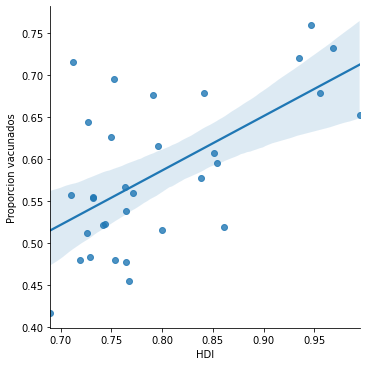

In [48]:
sns.lmplot(x='HDI', y="Proporcion vacunados", data=Vacu);
correlation1 = Vacu['HDI'].corr(Vacu["Proporcion vacunados"])
print(correlation1)

## Como se puede observar a continuacion igualmente hay una mayor proporcion de vacunados por comuna al haber una mayor proporcion de gente mayor 65+, lo cual si relacionamos, con que se puede observar en la tabla anterior que la mayor proporcion de adultos mayores esta en comunas de mayor indice, puede ser entonces esta la causa de que aparentemente los sectores de mayor desarrollo tengan "privilegios" para las vacunas. Por lo que no se puede asegurar que lo dicho anteriormente

0.5476250312007653


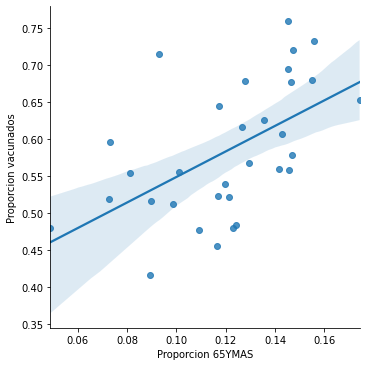

In [47]:
sns.lmplot(x='Proporcion 65YMAS', y="Proporcion vacunados", data=Vacu);
correlation1 = Vacu['Proporcion 65YMAS'].corr(Vacu["Proporcion vacunados"])
print(correlation1)


-0.24138339535140851


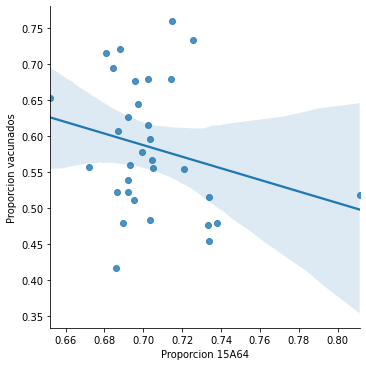

In [46]:
sns.lmplot(x="Proporcion 15A64", y="Proporcion vacunados", data=Vacu);
correlation1 = Vacu["Proporcion 15A64"].corr(Vacu["Proporcion vacunados"])
print(correlation1)



-0.3178302814057149


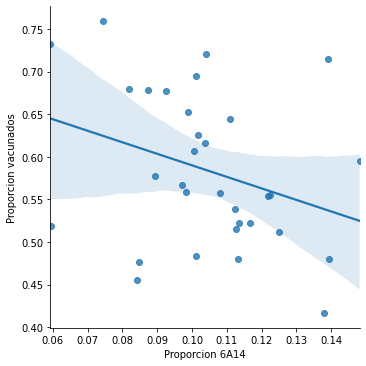

In [45]:
sns.lmplot(x="Proporcion 6A14", y="Proporcion vacunados", data=Vacu);
correlation1 = Vacu["Proporcion 6A14"].corr(Vacu["Proporcion vacunados"])
print(correlation1)

-0.33090988625679957


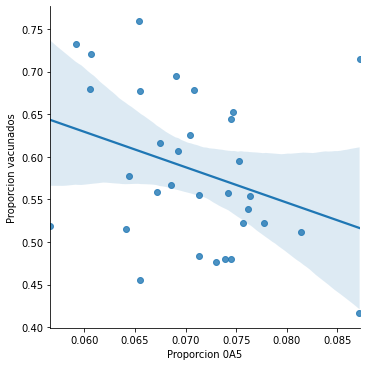

In [44]:
sns.lmplot(x="Proporcion 0A5", y="Proporcion vacunados", data=Vacu);
correlation1 = Vacu["Proporcion 0A5"].corr(Vacu["Proporcion vacunados"])
print(correlation1)
